# Definição do Problema

Prever o turnover (rotatividade) de empregados com base em várias características, como demografia, profissão, características psicológicas e outros atributos relacionados ao trabalho.

In [1]:
import pandas as pd

turnover_data = pd.read_csv('turnover.csv')

# Visão Geral dos Dados

Ao visualizar os dados vemos que existem 16 atributos, dos quais "EVENT" sera o atributo target da nossa predicao.

**stag**: Tempo t quando ocorreu o turnover ou tempo de censura do estudo.
**event**: Indica se o evento ocorreu no tempo t.  
**gender**: Gênero do funcionário.  
**age**: Idade do funcionário.  
**industry**: Indústria de atuação do funcionário.  
**profession**: Profissão do funcionário.  
**traffic**: De qual canal o funcionário ingressou para a empresa  
**coach**: Presença de um coach  
**head_gender**: Gênero do supervisor ao qual o funcionario responde  
**greywage**: se o empregador paga apenas uma pequena quantia de salário acima do salário mínimo (white).  
**way**: Forma que o funcionário se desloca para o escritório.  
**extraversion**: Escala segundo o teste Big5.  
**independ**: Escala segundo o teste Big5.  
**selfcontrol**: Escala segundo o teste Big5.  
**anxiety**: Escala segundo o teste Big5.  
**novator**: Escala segundo o teste Big5.  

In [2]:
turnover_data.head()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


# Pré-processamento de Dados

## Tratamento de Nulos

In [3]:
pd.DataFrame({
    'Null Count': turnover_data.isnull().sum().fillna(0).astype(int),
    'Dtype': turnover_data.dtypes
})

,Null Count,Dtype
stag,0,float64
event,0,int64
gender,0,object
age,0,float64
industry,0,object
profession,0,object
traffic,0,object
coach,0,object
head_gender,0,object
greywage,0,object


Em uma primeira analise vemos que nao existem valores nulos na nossa base, assim como os tipos de valores existentes sao:

quantitativo continuo = 7  
qualitativo nominal = 8

Tambem vemos que na base nao existem valores nulos ou faltando

## Valores repetidos

In [4]:
duplicated_rows = turnover_data[turnover_data.duplicated()]
print(f"Numero de linhas duplicadas = {duplicated_rows.shape[0]}")

Numero de linhas duplicadas = 13


In [5]:
turnover_data = turnover_data.drop_duplicates()

## Outliers

Para determinar os outliers e' necessario fazer um estudo sobre os quartis e ver como estes se comportam, porque assim e' possivel saber se existe uma tendencia a possuir mais valores de um tipo do que outro e assim analisar os outliers

In [6]:
turnover_data.describe()

,stag,event,age,extraversion,independ,selfcontrol,anxiety,novator
count,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000
mean,36.701802,0.501792,31.024734,5.589606,5.474462,5.607527,5.666667,5.877330
std,34.173048,0.500221,6.973078,1.857401,1.702149,1.985720,1.711035,1.903534
min,0.394251,0.000000,18.000000,1.000000,1.000000,1.000000,1.700000,1.000000
25%,11.720739,0.000000,26.000000,4.600000,4.100000,4.100000,4.800000,4.400000
50%,24.443532,1.000000,30.000000,5.400000,5.500000,5.700000,5.600000,6.000000
75%,51.622177,1.000000,36.000000,7.000000,6.900000,7.200000,7.100000,7.500000
max,179.449692,1.000000,58.000000,10.000000,10.000000,10.000000,10.000000,10.000000


Devido a natureza de que outliers so irao existir em categorias numericas diversas colunas podem ser ignoradas, alem disso com excessaode stag todas as colunas apresentam uma distribuicao igualitaria onde o valor do quartil se encaixa de maneira consideravelmente proxima a porcentagem do valor maximo em relacao ao minimo. Portanto a coluna stag e' a unica qual deve ser analisado a existencia de outliers.

Esta situacao uma boa tecnica e' o uso do z-score, o qual mede o desvio padrao de uma instancia em relacao a media, assim podemos captar outliers.

In [7]:
# Cálculo dos z-scores para todas as colunas numéricas do DataFrame
z_scores = (turnover_data['stag'] - turnover_data['stag'].mean()) / turnover_data['stag'].std()

# Recuperando as linhas que possuem outliers baseado no z-score 3
outliers = z_scores[(z_scores > 3) | (z_scores < -3)].index

len(outliers)

21

In [8]:
turnover_data = turnover_data.drop(outliers)
turnover_data.describe()

,stag,event,age,extraversion,independ,selfcontrol,anxiety,novator
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,34.447804,0.503196,31.103747,5.600913,5.481187,5.606393,5.650228,5.876256
std,30.295030,0.500218,6.975175,1.860481,1.698809,1.983804,1.715308,1.911019
min,0.394251,0.000000,18.000000,1.000000,1.000000,1.000000,1.700000,1.000000
25%,11.548255,0.000000,26.000000,4.600000,4.100000,4.100000,4.800000,4.400000
50%,24.016427,1.000000,30.000000,5.400000,5.500000,5.700000,5.600000,6.000000
75%,50.135524,1.000000,36.000000,7.000000,6.900000,7.200000,7.100000,7.500000
max,139.071869,1.000000,58.000000,10.000000,10.000000,10.000000,10.000000,10.000000


O outlier 2.5 se mostrou adequado pois foi o que mais aproximou o valor discrepante do padrao de quartis

## Balanceamento

Para saber se uma base de dados e' balanceada deve-se olhar a destribuicao entre o atributo target, que neste caso e' a coluna **event**

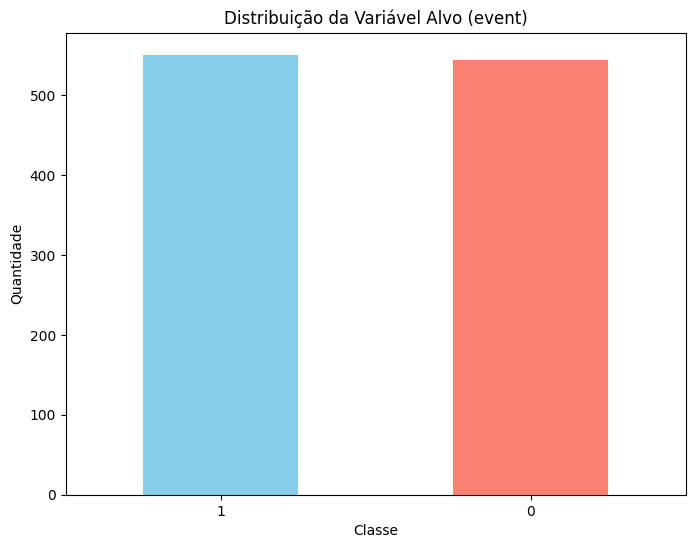

In [9]:
import matplotlib.pyplot as plt

# Análise da distribuição da variável alvo
event_distribution = turnover_data['event'].value_counts()

# Plotando a distribuição
plt.figure(figsize=(8, 6))
event_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribuição da Variável Alvo (event)')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.show()

Dado que a base nao e' desbalanceada, basta seguir em frente

# Transformação de Dados

In [10]:
# Calculando a quantidade de categorias únicas para cada variável categórica
unique_counts = turnover_data[['gender', 'industry', 'profession', 'traffic', 'coach', 'head_gender', 'greywage', 'way']].nunique()

unique_counts

gender          2
industry       16
profession     15
traffic         8
coach           3
head_gender     2
greywage        2
way             3
dtype: int64

Analisando a quantidade de possiveis instancias por coluna chega-se a conclusao de que existem:  
3 colunas binarizaveis (gender, head_gender e greywage)  
2 colunas pequenas o suficiente para realizar encode ou one hot (coach e way)  
3 colunas que precisarao de um estudo de caso para decidir como trata-las  

## Industry

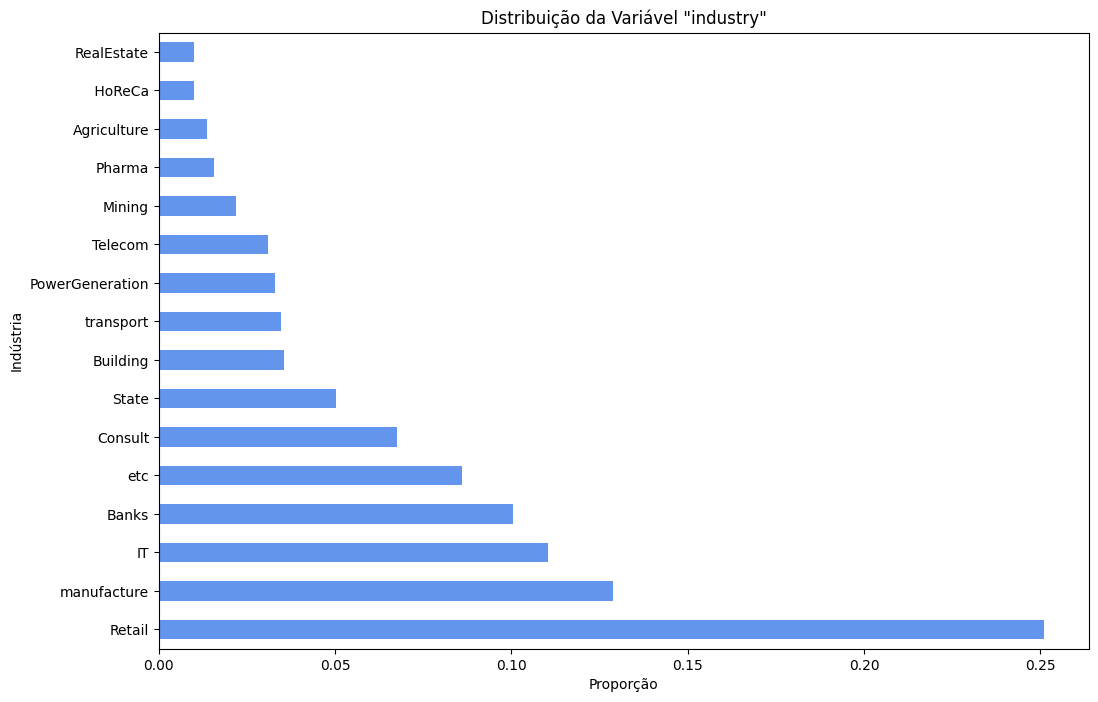

In [11]:
# Análise da variável 'industry'
industry_distribution = turnover_data['industry'].value_counts(normalize=True)

# Plotando a distribuição
plt.figure(figsize=(12, 8))
industry_distribution.plot(kind='barh', color='cornflowerblue')
plt.title('Distribuição da Variável "industry"')
plt.xlabel('Proporção')
plt.ylabel('Indústria')
plt.show()

Industry possui diversos valores com uma destribuicao consideravel em cada feature.  
Por isso a estrategia adotada sera realizar um encoding onde o valor de industry sera substituido pela porcentagem de quantos desses resultados terminaram em turnover, assim ainda permitindo que o modelo retire insights valiosos da feature.

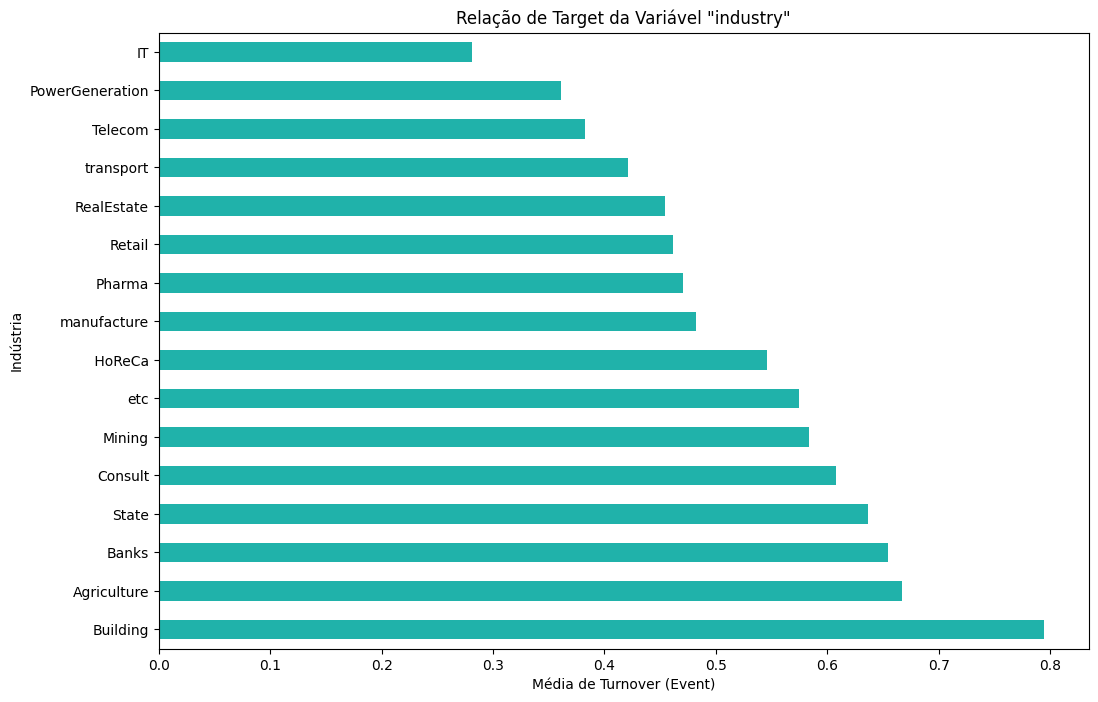

In [12]:
# Calculando a relação de target (mean encoding) para a variável 'industry'
industry_target_relation = turnover_data.groupby('industry')['event'].mean()

# Ordenando os valores para melhor visualização
industry_target_relation_sorted = industry_target_relation.sort_values(ascending=False)

# Plotando a relação de target da variável 'industry'
plt.figure(figsize=(12, 8))
industry_target_relation_sorted.plot(kind='barh', color='lightseagreen')
plt.title('Relação de Target da Variável "industry"')
plt.xlabel('Média de Turnover (Event)')
plt.ylabel('Indústria')
plt.show()

Dado uma relacao satisfatoria que separa os atributos, o tornam valido para a utilizacao da tecnica, portanto pode-se substituir na tabela original o novo valor

In [13]:
# Aplicando a codificação target (mean encoding) para a variável 'industry' no dataset original
turnover_data['industry_encoded'] = turnover_data['industry'].map(industry_target_relation)

# Substituindo a coluna 'industry' pela coluna 'industry_encoded'
turnover_data.drop('industry', axis=1, inplace=True)
turnover_data.rename(columns={'industry_encoded': 'industry'}, inplace=True)

# Exibindo as primeiras linhas do dataframe após a substituição
turnover_data.head()

,stag,event,gender,age,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator,industry
0,7.030801,1,m,35.0,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3,0.654545
1,22.965092,1,m,33.0,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3,0.654545
2,15.934292,1,f,35.0,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3,0.361111
3,15.934292,1,f,35.0,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7,0.361111
4,8.410678,1,m,32.0,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7,0.461818


## Profession

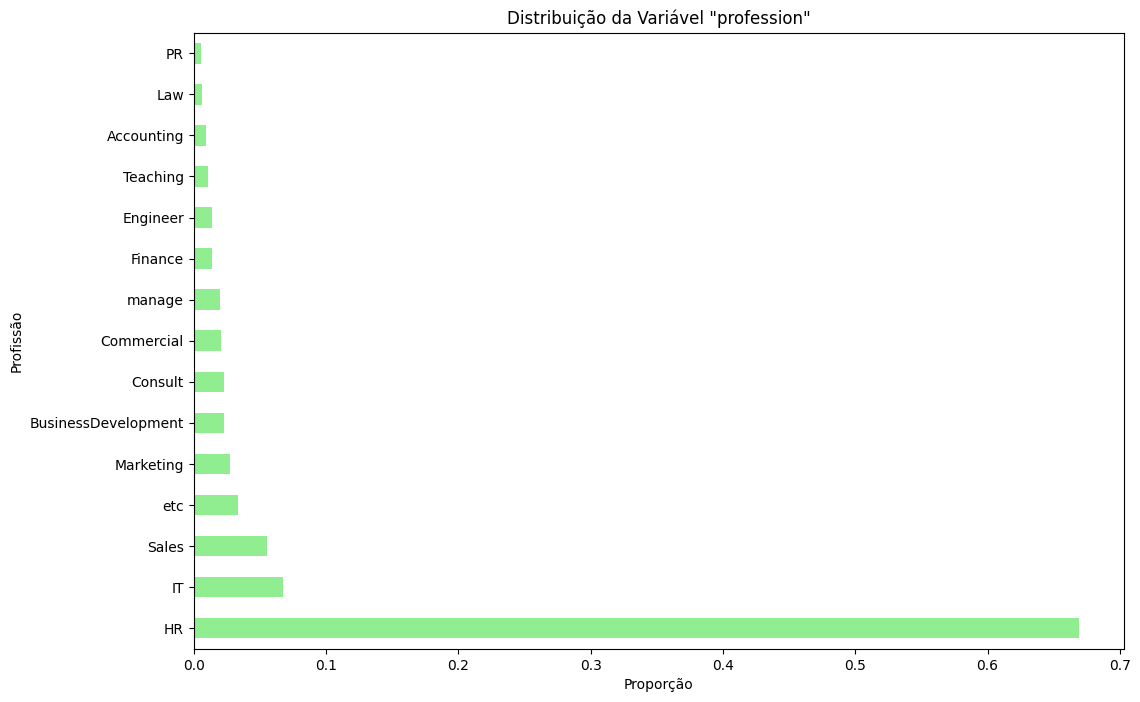

In [14]:
# Análise da variável 'profession'
profession_distribution = turnover_data['profession'].value_counts(normalize=True)

# Plotando a distribuição
plt.figure(figsize=(12, 8))
profession_distribution.plot(kind='barh', color='lightgreen')
plt.title('Distribuição da Variável "profession"')
plt.xlabel('Proporção')
plt.ylabel('Profissão')
plt.show()

Diferente de Industry, Profession possui uma grande quantidade de instancias aglomeradas em uma unica classe de maneira desbalanceada, portanto os valores de classes como PR nao irao apresentar um resultado relevante para o nosso modelo. Para tratar isso as classes com uma quantidade de instancias menor que "Etc" sao colocadas dentro desta mesma classe

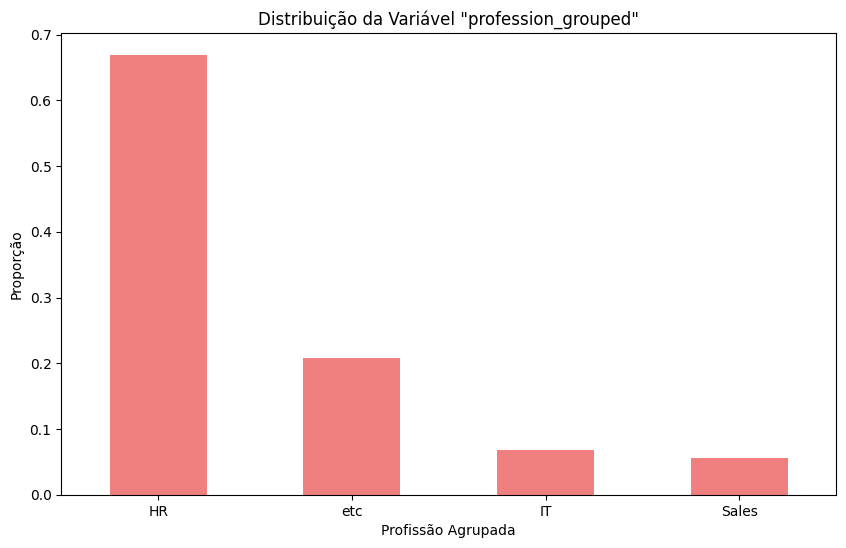

In [15]:
# Calculando a distribuição das categorias em 'profession'
profession_distribution_original = turnover_data['profession'].value_counts(normalize=True)

# Identificando as categorias que serão agrupadas em "etc"
threshold_original = profession_distribution_original['etc']
categories_to_group_original = profession_distribution_original[profession_distribution_original <= threshold_original].index

# Agrupando categorias menos frequentes em "etc"
turnover_data['profession_grouped'] = turnover_data['profession'].apply(lambda x: 'etc' if x in categories_to_group_original else x)

# Verificando a distribuição após o agrupamento
updated_profession_distribution = turnover_data['profession_grouped'].value_counts(normalize=True)

# Plotando a distribuição da variável 'profession_grouped'
plt.figure(figsize=(10, 6))
updated_profession_distribution.plot(kind='bar', color='lightcoral')
plt.title('Distribuição da Variável "profession_grouped"')
plt.xlabel('Profissão Agrupada')
plt.ylabel('Proporção')
plt.xticks(rotation=0)
plt.show()

Estando as instancias categorizadas em uma pequena quantidade de classes, agora se torna possivel utilizar One Hot Encoding para ser possivel classificar o atributo

In [16]:
# Realizando one-hot encoding para 'profession_grouped'
profession_onehot = pd.get_dummies(turnover_data['profession_grouped'], prefix='profession', drop_first=False)

# Concatenando o one-hot encoding ao dataframe original
turnover_data = pd.concat([turnover_data, profession_onehot], axis=1)

# Removendo as colunas 'profession' e 'profession_grouped' já que não são mais necessárias
turnover_data.drop(['profession', 'profession_grouped'], axis=1, inplace=True)

# Exibindo as primeiras linhas do dataframe atualizado
turnover_data.head()

,stag,event,gender,age,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator,industry,profession_HR,profession_IT,profession_Sales,profession_etc
0,7.030801,1,m,35.0,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3,0.654545,True,False,False,False
1,22.965092,1,m,33.0,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3,0.654545,True,False,False,False
2,15.934292,1,f,35.0,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3,0.361111,True,False,False,False
3,15.934292,1,f,35.0,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7,0.361111,True,False,False,False
4,8.410678,1,m,32.0,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7,0.461818,False,False,False,True


## Traffic

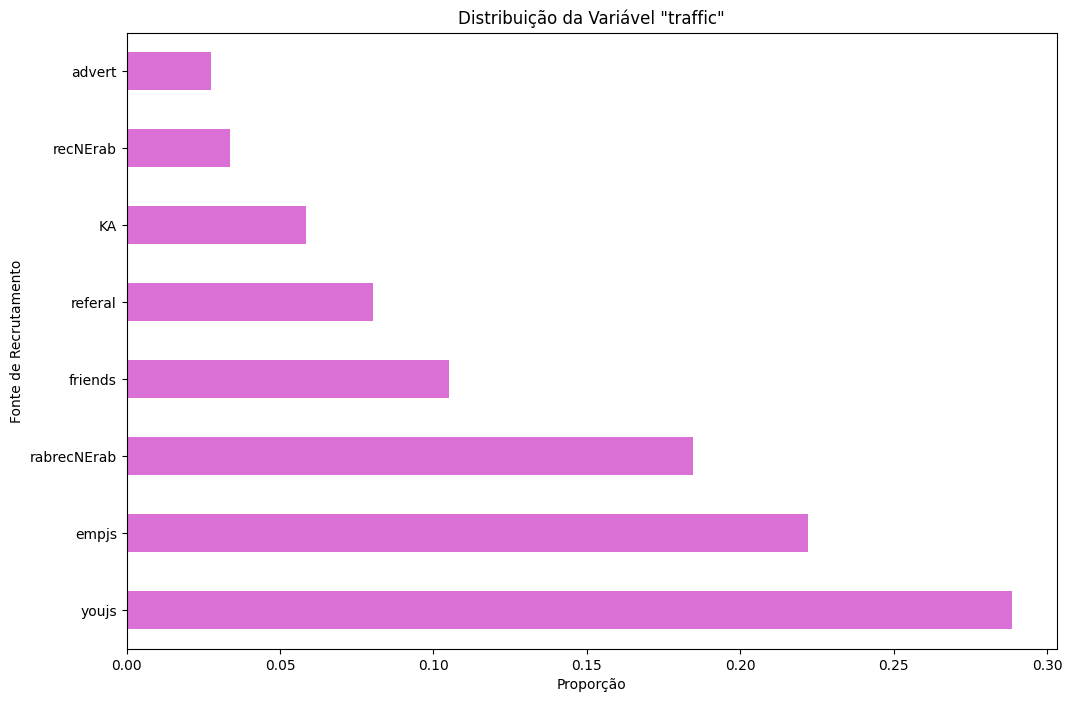

In [17]:
# Análise da variável 'traffic'
traffic_distribution = turnover_data['traffic'].value_counts(normalize=True)

# Plotando a distribuição
plt.figure(figsize=(12, 8))
traffic_distribution.plot(kind='barh', color='orchid')
plt.title('Distribuição da Variável "traffic"')
plt.xlabel('Proporção')
plt.ylabel('Fonte de Recrutamento')
plt.show()

Traffic acaba tendo o mesmo problema de Industry por nao ter um desbalanceamento demasiadamente grande, por isso e' sugerido seguir pelo mesmo caminho de realizar um mean encoding

In [18]:
# Calculando mean encoding para a variável 'traffic'
traffic_mean_encoding = turnover_data.groupby('traffic')['event'].mean()

# Aplicando a codificação para visualização
turnover_data['traffic_encoded'] = turnover_data['traffic'].map(traffic_mean_encoding)

# Exibindo as primeiras linhas da coluna original 'traffic' e da coluna codificada 'traffic_encoded'
traffic_comparison = turnover_data[['traffic', 'traffic_encoded']].drop_duplicates().sort_values(by='traffic_encoded', ascending=False)

# Substituindo a coluna 'traffic' pela coluna 'traffic_encoded'
turnover_data.drop('traffic', axis=1, inplace=True)
turnover_data.rename(columns={'traffic_encoded': 'traffic'}, inplace=True)

# Exibindo as primeiras linhas do dataframe após a substituição
turnover_data.head()

,stag,event,gender,age,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator,industry,profession_HR,profession_IT,profession_Sales,profession_etc,traffic
0,7.030801,1,m,35.0,no,f,white,bus,6.2,4.1,5.7,7.1,8.3,0.654545,True,False,False,False,0.608911
1,22.965092,1,m,33.0,no,m,white,bus,6.2,4.1,5.7,7.1,8.3,0.654545,True,False,False,False,0.522634
2,15.934292,1,f,35.0,no,m,white,bus,6.2,6.2,2.6,4.8,8.3,0.361111,True,False,False,False,0.608911
3,15.934292,1,f,35.0,no,m,white,bus,5.4,7.6,4.9,2.5,6.7,0.361111,True,False,False,False,0.608911
4,8.410678,1,m,32.0,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7,0.461818,False,False,False,True,0.439873


## Coach

Coach pode ser considerado um atributo binario a partir de certo ponto de vista, mas para a pesquisa foi diferenciado entre o coach ser um agente externo ou o proprio treinador do funcionario, para isso e' seguro afirmar que podemos realizar um encoding contando que "my head" seja colocado ao lado de "yes" como um supertipo, mas nao importando a ordem entre os dois

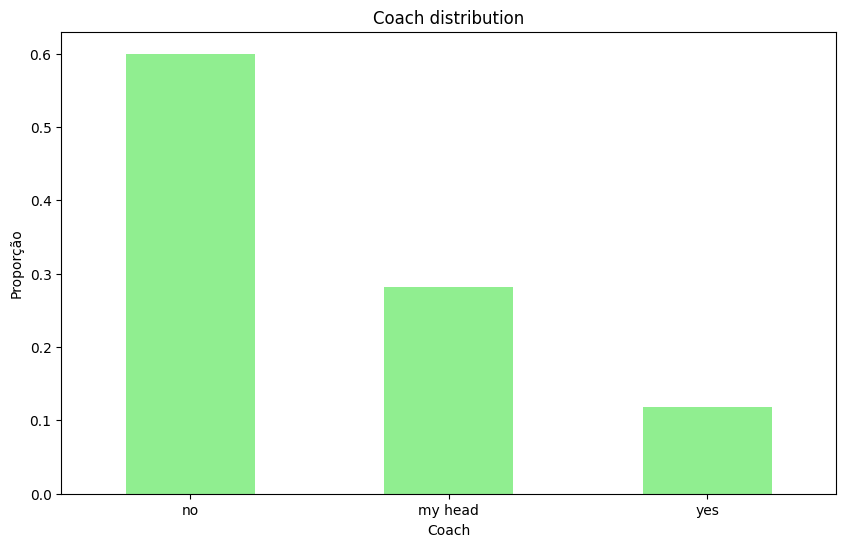

coach
no         0.600000
my head    0.281279
yes        0.118721
Name: proportion, dtype: float64

In [19]:
# Calculando a distribuição dos valores na coluna 'coach'
coach_distribution = turnover_data['coach'].value_counts(normalize=True)

# Plotando a distribuição dos valores
plt.figure(figsize=(10, 6))
coach_distribution.plot(kind='bar', color='lightgreen')
plt.title('Coach distribution')
plt.xlabel('Coach')
plt.ylabel('Proporção')
plt.xticks(rotation=0)
plt.show()

coach_distribution

In [20]:
# Criando a coluna 'coach_encoded'
turnover_data['coach_encoded'] = turnover_data['coach'].map({'yes': 2, 'no': 0, 'my head': 1})

# Removendo a coluna original 'coach'
turnover_data.drop('coach', axis=1, inplace=True)

## Way

Os valores de way nao sao possiveis de se relacionar diretamente por nao possuirem uma cardinalidade, portanto deve-se usar uma estrategia de separalos em atributos binarizados ja que possuem apenas 3 tipos de instancias

In [21]:
# Realizando one-hot encoding para a variável 'way'
way_onehot = pd.get_dummies(turnover_data['way'], prefix='way', drop_first=False)

# Concatenando o one-hot encoding ao dataframe original
turnover_data = pd.concat([turnover_data, way_onehot], axis=1)

# Removendo a coluna original 'way' já que não é mais necessária
turnover_data.drop('way', axis=1, inplace=True)

# Exibindo as primeiras linhas do dataframe após o one-hot encoding
turnover_data.head()

,stag,event,gender,age,head_gender,greywage,extraversion,independ,selfcontrol,anxiety,...,industry,profession_HR,profession_IT,profession_Sales,profession_etc,traffic,coach_encoded,way_bus,way_car,way_foot
0,7.030801,1,m,35.0,f,white,6.2,4.1,5.7,7.1,...,0.654545,True,False,False,False,0.608911,0,True,False,False
1,22.965092,1,m,33.0,m,white,6.2,4.1,5.7,7.1,...,0.654545,True,False,False,False,0.522634,0,True,False,False
2,15.934292,1,f,35.0,m,white,6.2,6.2,2.6,4.8,...,0.361111,True,False,False,False,0.608911,0,True,False,False
3,15.934292,1,f,35.0,m,white,5.4,7.6,4.9,2.5,...,0.361111,True,False,False,False,0.608911,0,True,False,False
4,8.410678,1,m,32.0,f,white,3.0,4.1,8.0,7.1,...,0.461818,False,False,False,True,0.439873,2,True,False,False


## Binarizacao de atributos com 2 categorias

In [22]:
# Identificando colunas com exatamente 2 valores únicos
binary_columns = [col for col in turnover_data.columns if turnover_data[col].nunique() == 2]

# Binarizando as colunas identificadas
for col in binary_columns:
    unique_vals = turnover_data[col].unique()
    turnover_data[col] = turnover_data[col].replace({unique_vals[0]: 0, unique_vals[1]: 1})

# Exibindo as primeiras linhas do dataframe após a binarização
turnover_data.head()

,stag,event,gender,age,head_gender,greywage,extraversion,independ,selfcontrol,anxiety,...,industry,profession_HR,profession_IT,profession_Sales,profession_etc,traffic,coach_encoded,way_bus,way_car,way_foot
0,7.030801,0,0,35.0,0,0,6.2,4.1,5.7,7.1,...,0.654545,0,0,0,0,0.608911,0,0,0,0
1,22.965092,0,0,33.0,1,0,6.2,4.1,5.7,7.1,...,0.654545,0,0,0,0,0.522634,0,0,0,0
2,15.934292,0,1,35.0,1,0,6.2,6.2,2.6,4.8,...,0.361111,0,0,0,0,0.608911,0,0,0,0
3,15.934292,0,1,35.0,1,0,5.4,7.6,4.9,2.5,...,0.361111,0,0,0,0,0.608911,0,0,0,0
4,8.410678,0,0,32.0,0,0,3.0,4.1,8.0,7.1,...,0.461818,1,0,0,1,0.439873,2,0,0,0


## Normalizacao \ Padronizacao

In [23]:
# Exibindo as primeiras linhas do dataframe após a normalização
turnover_data.describe().loc[['min', 'max']]

,stag,event,gender,age,head_gender,greywage,extraversion,independ,selfcontrol,anxiety,...,industry,profession_HR,profession_IT,profession_Sales,profession_etc,traffic,coach_encoded,way_bus,way_car,way_foot
min,0.394251,0.0,0.0,18.0,0.0,0.0,1.0,1.0,1.0,1.7,...,0.280992,0.0,0.0,0.0,0.0,0.339130,0.0,0.0,0.0,0.0
max,139.071869,1.0,1.0,58.0,1.0,1.0,10.0,10.0,10.0,10.0,...,0.794872,1.0,1.0,1.0,1.0,0.693182,2.0,1.0,1.0,1.0


Deviao aos valores estarem contidos dentro de um range relativamente curto, nao se torna obrigatorio realizar a normalizacao, mas ainda sim se torna benefico para qualidade do nosso modelo para evitar peso desnecessario em stag

In [24]:
# Identificando colunas que precisam ser normalizadas
columns_to_normalize = [col for col in turnover_data.columns 
                        if turnover_data[col].min() < 0 or turnover_data[col].max() > 1]

# Normalizando as colunas identificadas
for col in columns_to_normalize:
    turnover_data[col] = (turnover_data[col] - turnover_data[col].min()) / \
                                 (turnover_data[col].max() - turnover_data[col].min())

turnover_data.describe().loc[['min', 'max']]

,stag,event,gender,age,head_gender,greywage,extraversion,independ,selfcontrol,anxiety,...,industry,profession_HR,profession_IT,profession_Sales,profession_etc,traffic,coach_encoded,way_bus,way_car,way_foot
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.280992,0.0,0.0,0.0,0.0,0.339130,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.794872,1.0,1.0,1.0,1.0,0.693182,1.0,1.0,1.0,1.0


# Análise Exploratória de Dados

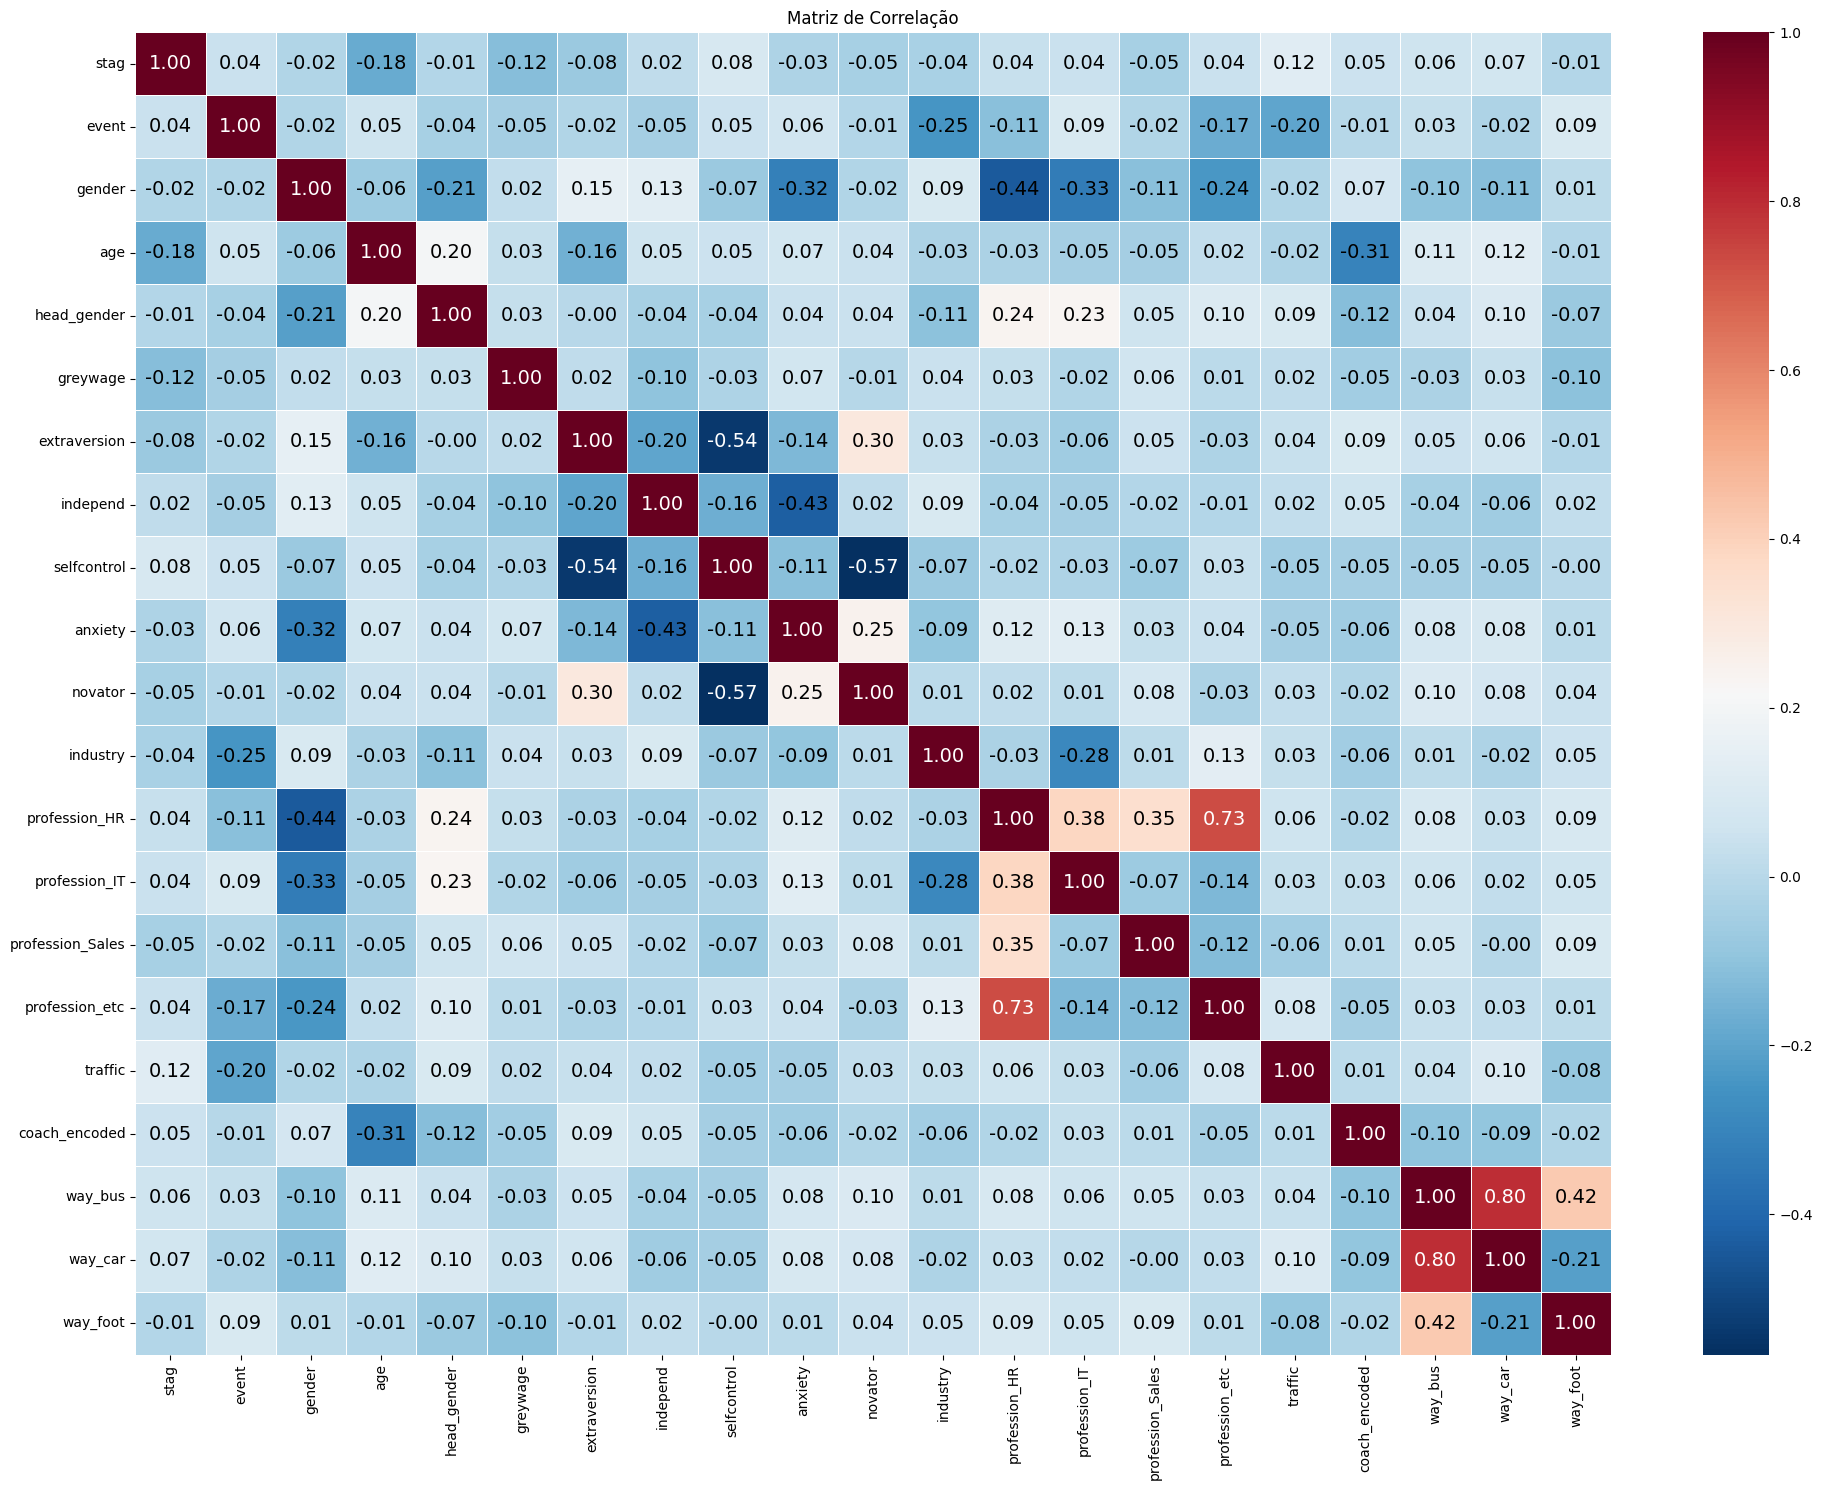

In [25]:
import seaborn as sns

# Calculando a matriz de correlação
correlation_matrix = turnover_data.corr()

# Plotando a matriz de correlação usando um heatmap
plt.figure(figsize=(20, 15))
ax = sns.heatmap(correlation_matrix, cmap='RdBu_r', fmt='.2f', linewidths=0.5)

# Adicionar anotações numéricas manualmente
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        value = correlation_matrix.iloc[i, j]
        # Ajustando a cor baseada no valor da correlação
        text_color = 'black' if -0.5 < value < 0.5 else 'white'
        ax.text(j + 0.5, i + 0.5, f'{value:.2f}', ha='center', va='center', color=text_color, fontsize=14)

plt.title('Matriz de Correlação')
plt.tight_layout()
plt.show()

E possivel identificar que existe correlacao consideravelmente alta entre os valores de way_car para way_bus assim como de professional_etc para professional_HR

mas para o caso de way_car, a relacao entre este valor para way_foot fornece um insight importante para perceber que por mesmo que exista uma correlacao proxima, ele ainda e' um forte candidato a realizar desempates em relacao a terceiras e quartas variaveis.

Ambos os dois casos naturalmente possuem uma correlacao devido ao fato de serem mutuamente excludentes durante seu processo de encoding, mas ainda sim seus valores interferem na avaliacao final do modelo

# Divisão dos Dados

Devido a pequena quantidade de dados da base se torna necessario separar uma maior quantidade de valores de treinamento paara os modelos

In [26]:
from sklearn.model_selection import train_test_split

# Dividindo os dados em conjuntos de treinamento e validação de forma aleatória
train_data_simple, validation_data_simple = train_test_split(turnover_data, test_size=0.15, random_state=66)

# Verificando o tamanho dos conjuntos
len(train_data_simple), len(validation_data_simple)

(930, 165)

In [27]:
# Definindo as características e a variável alvo
X_train = train_data_simple.drop('event', axis=1)
y_train = train_data_simple['event']
X_val = validation_data_simple.drop('event', axis=1)
y_val = validation_data_simple['event']

# Criacao dos Modelos

Varios modelos serao usados para treinamento para que sejamos capazes de chegar a uma boa conclusao sobre a resolucao proposta para o problemas. Para isso e' importante definir funcoes para facilitar a parte comum entre os modelos

In [28]:
# Avaliacao de modelos
from sklearn.metrics import classification_report

# Definicao de algumas funcoes uteis para a chamada dos modelos

def compute_report(y_pred):
    report = classification_report(y_val, y_pred, output_dict=True, target_names=['No', 'Yes'])
    report = pd.DataFrame(report).transpose().round(2)
    report = report.drop(['macro avg', 'weighted avg'])
    report = report.drop(['support'], axis=1)
    accuracy_val = report.loc['accuracy', 'precision']
    report = report.drop('accuracy')
    report.loc['accuracy'] = [accuracy_val, "", ""]

    return report

def predict(model):
    model.fit(X_train, y_train)
    return model.predict(X_val)


# Treinamento dos modelos

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow import keras
from keras import layers

# Criando os modelos
dt = DecisionTreeClassifier(random_state=66)
rf = RandomForestClassifier(random_state=66, n_estimators=100)
nb = GaussianNB()
gb = GradientBoostingClassifier(random_state=66)
lr = LogisticRegression(max_iter=1000, random_state=66)

nn = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
_ = nn.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=40,
    batch_size=32,
    verbose=0
)

# Predicao de novos valores

In [30]:
# Fazendo previsões
dt_y_pred = predict(dt)
rf_y_pred = predict(rf)
nb_y_pred = predict(nb)
gb_y_pred = predict(gb)
lr_y_pred = predict(lr)
nn_y_pred = (nn.predict(X_val) > 0.5).astype("int32").flatten()

6/6 [==============================] - 0s 938us/step


# Matriz de confusao

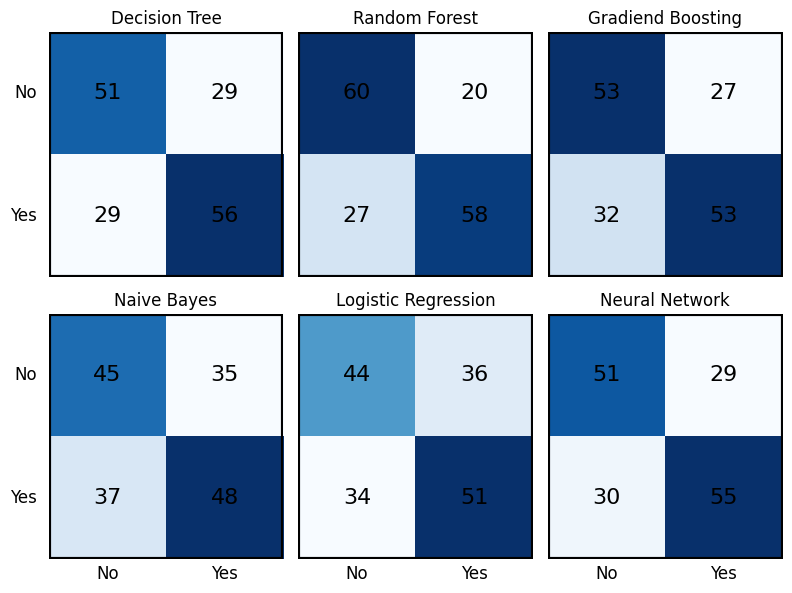

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from matplotlib.patches import Rectangle

conf_matrix_dt = confusion_matrix(y_val, dt_y_pred)
conf_matrix_rf = confusion_matrix(y_val, rf_y_pred)
conf_matrix_gb = confusion_matrix(y_val, gb_y_pred)
conf_matrix_nb = confusion_matrix(y_val, nb_y_pred)
conf_matrix_lr = confusion_matrix(y_val, lr_y_pred)
conf_matrix_nn = confusion_matrix(y_val, nn_y_pred)

matrices = [conf_matrix_dt, conf_matrix_rf, conf_matrix_gb, conf_matrix_nb, conf_matrix_lr, conf_matrix_nn]
titles = ['Decision Tree', 'Random Forest', 'Gradiend Boosting', 'Naive Bayes', 'Logistic Regression', 'Neural Network']

fig, axarr = plt.subplots(2, 3, figsize=(8, 6))  # 2 linhas, 3 colunas

# Para facilitar a iteração, vamos achatá-lo (flatten)
axes = axarr.flatten()

classes = ['No', 'Yes']  # Classes
label_fontsize = 12  # Tamanho da fonte para os rótulos das classes

# Agora iteramos sobre as matrizes e os títulos como antes, mas usando o axes achatado
for i, (matrix, title) in enumerate(zip(matrices, titles)):
    axes[i].imshow(matrix, cmap="Blues", aspect='auto')
    axes[i].set_title(title)
    
    # Adicionar anotações numéricas com tamanho de fonte maior
    for j in range(matrix.shape[0]):
        for k in range(matrix.shape[1]):
            axes[i].text(k, j, str(matrix[j, k]), ha='center', va='center', fontsize=16)
    
    axes[i].axis('off')
    rect = Rectangle((0,0), 1, 1, edgecolor='black', facecolor='none', transform=axes[i].transAxes, linewidth=3)
    axes[i].add_patch(rect)

    # Rótulos das linhas (classe verdadeira)
    if i == 0 or i == 3:
        for j, cls in enumerate(classes):
            axes[i].text(-0.6, j, cls, ha='right', va='center', color='black', fontsize=label_fontsize, transform=axes[i].transData)
        # Rótulos das colunas (classe prevista)
    if i == 3 or i == 4 or i == 5:  
        for j, cls in enumerate(classes):
            axes[i].text(j, 1.7, cls, ha='center', va='bottom', color='black', fontsize=label_fontsize, transform=axes[i].transData)

plt.tight_layout()
plt.show()

A partir de uma visao geral da matriz de confusao conseguimos perceber que existe uma proporcao entre a predicao correta de valores sim/nao, mostrando que a precisao ira se aproximar bastante do recall

# Validacao do modelo

In [32]:
# Computando a validacao do modelo
dt_report = compute_report(dt_y_pred)
rf_report = compute_report(rf_y_pred)
nb_report = compute_report(nb_y_pred)
gb_report = compute_report(gb_y_pred)
lr_report = compute_report(lr_y_pred)
nn_report = compute_report(nn_y_pred)

dt_report['model'] = 'Decision Tree'
rf_report['model'] = 'Random Forest'
gb_report['model'] = 'Gradiend Boosting'
nb_report['model'] = 'Naive Bayes'
lr_report['model'] = 'Logistic Regression'
nn_report['model'] = 'Neural Network'

reports = [dt_report, rf_report, gb_report, nb_report, lr_report, nn_report]

def transform_report(report):
    transformed = {
        'Model': report['model'].iloc[0],
        'Accuracy': report.loc['accuracy', 'precision'],
        'Precision(No)': report.loc['No', 'precision'],
        'Recall(No)': report.loc['No', 'recall'],
        'F1-Score(No)': report.loc['No', 'f1-score'],
        'Precision(Yes)': report.loc['Yes', 'precision'],
        'Recall(Yes)': report.loc['Yes', 'recall'],
        'F1-Score(Yes)': report.loc['Yes', 'f1-score'],
    }
    return transformed

summary_data = [transform_report(report) for report in reports]
summary_df = pd.DataFrame(summary_data)

summary_df

,Model,Accuracy,Precision(No),Recall(No),F1-Score(No),Precision(Yes),Recall(Yes),F1-Score(Yes)
0,Decision Tree,0.65,0.64,0.64,0.64,0.66,0.66,0.66
1,Random Forest,0.72,0.69,0.75,0.72,0.74,0.68,0.71
2,Gradiend Boosting,0.64,0.62,0.66,0.64,0.66,0.62,0.64
3,Naive Bayes,0.56,0.55,0.56,0.56,0.58,0.56,0.57
4,Logistic Regression,0.58,0.56,0.55,0.56,0.59,0.60,0.59
5,Neural Network,0.64,0.63,0.64,0.63,0.65,0.65,0.65


Dentre os modelos propostos o metodo de **Random Forest** foi aquele que teve o maior destaque, chegando a uma acuracia de 72%, uma precisao de 69% e um recall de 75%. Para decidir entre qual e' mais importante, seja Precisao ou Recall e' importante se analisar o contexto no qual a empresa que esta realizando a analise esta. 

Priorizar a **Precisao** esta correlacionado a ideia de diminuir o numero de "alarmes falsos", o que e' especialmente util caso a empresa queira realizar acoes caras ou significativas para intervir, como o oferecimento de bonus ou promocoes para reter talentos.

Priorizar o **Recall** se torna importante caso a empresa queira evitar perder funcionarios devido a rotatividade por exemplo. Ter um recall baixo significa que muitos funcionarios que realmente sairam nao foram identificados pelo modelos, isso se torna critico em setores ou funcoes onde a perda de talentos e' muito custosa para a organizacao (por exemplo em casos altamente especializados).

# Interpretabilidade dos modelos gerados

Modelos baseados em arvore podem ser usados para se analisar quais atributos tiveram mais importancia no treinamento, a partir de uma analise de quais foram os nos raiz gerados.

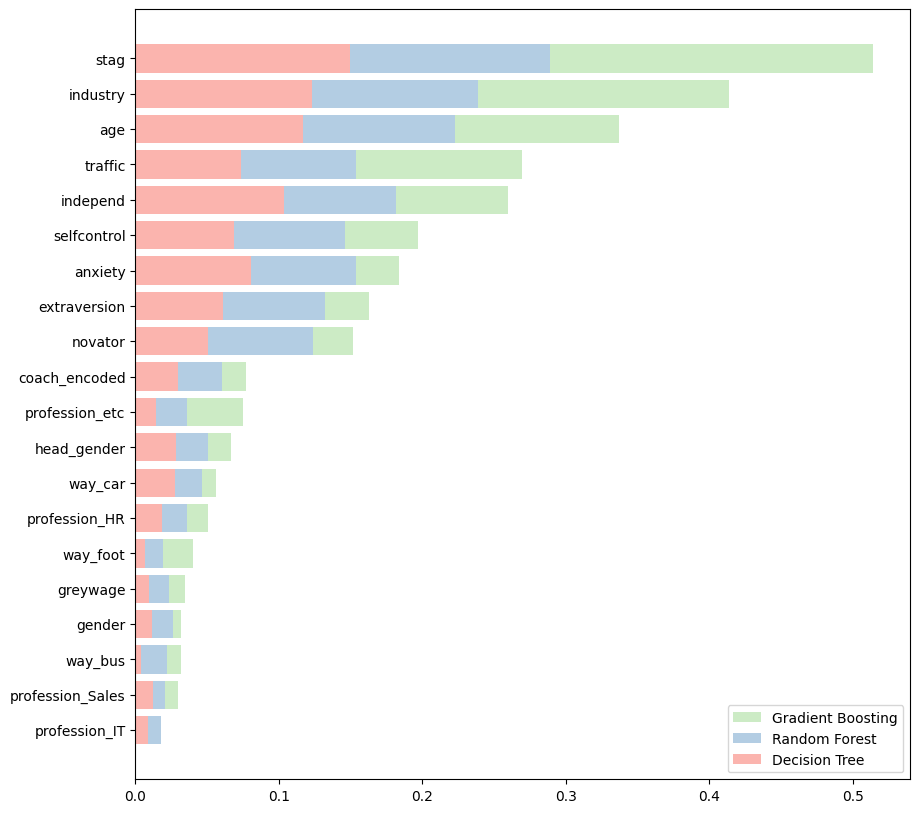

In [33]:
# Para Random Forest, por exemplo:
importances_dt = dt.feature_importances_
importances_rf = rf.feature_importances_
importances_gb = gb.feature_importances_

# Criando o DataFrame
df_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance_dt': importances_dt,
    'importance_rf': importances_rf,
    'importance_gb': importances_gb
})

# Crie uma coluna com o valor acumulado das importâncias
df_importances['total_importance'] = df_importances['importance_dt'] + df_importances['importance_rf'] + df_importances['importance_gb']

# Ordene o DataFrame com base na importância total, em ordem decrescente
df_importances = df_importances.sort_values(by='total_importance', ascending=False)

# Valores acumulados
df_importances['importance_rf_acc'] = df_importances['importance_dt'] + df_importances['importance_rf']
df_importances['importance_gb_acc'] = df_importances['importance_rf_acc'] + df_importances['importance_gb']

# Configurar figura e eixos
plt.figure(figsize=(10, 10))

colors = sns.color_palette("Pastel1", n_colors=3)
# Plotando importância para cada modelo
plt.barh(df_importances['feature'], df_importances['importance_gb_acc'], color=colors[2], label='Gradient Boosting')
plt.barh(df_importances['feature'], df_importances['importance_rf_acc'], color=colors[1], label='Random Forest')
plt.barh(df_importances['feature'], df_importances['importance_dt'], color=colors[0], label='Decision Tree')
plt.gca().invert_yaxis()


plt.legend(loc='lower right')
plt.show()

Com estes dados podemos chegar a algumas conclusoes importantes, sendo a principal o tempo de permanencia do funcionario o principal fator de influencia para saber se ele vai ficar na empresa ou nao. Outras inferencias podem ser feitas como a importancia do tipo de industria sobre o tipo de cargo, o que indica que o clima e cultura empresarial sao fortes candidatos para a analise de sobrevivencia de funcionarios. Por outro lado caracteristicas pessoais de auto controle e ansiedade se mostraram tambem importantes, sendo estas provavelmente relacionadas a resiliencia do individuo. E' valido ressaltar que o meio de contratacao pode acabar tambem indicando a existencia de fatores culturais vindos daquela plataforma. E por fim que a idade e' um fator crucial para saber a resiliencia de um funcionario em uma vaga.